# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch

Torch Requirements:
Mac

`brew install readline xz`

Ubuntu

`sudo apt-get install liblzma-dev`

Centos

`yum install -y xz-devel`

### Necessary Imports

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time

In [2]:
# Check if metal is available on your device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Metal Performance Shaders (MPS) for GPU acceleration.")
else:
    print("MPS is not available. Using CPU version notebook instead.")

Using Metal Performance Shaders (MPS) for GPU acceleration.


### Download The Dataset & Define The Transforms

In [3]:
### Run this cell

from torchvision import datasets
from torchvision.transforms import v2

# Define a transform to normalize the data
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.5,), (0.5,)),
])

# Download and load the training data
trainset = datasets.MNIST('data/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('data/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Exploring The Data

In [4]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


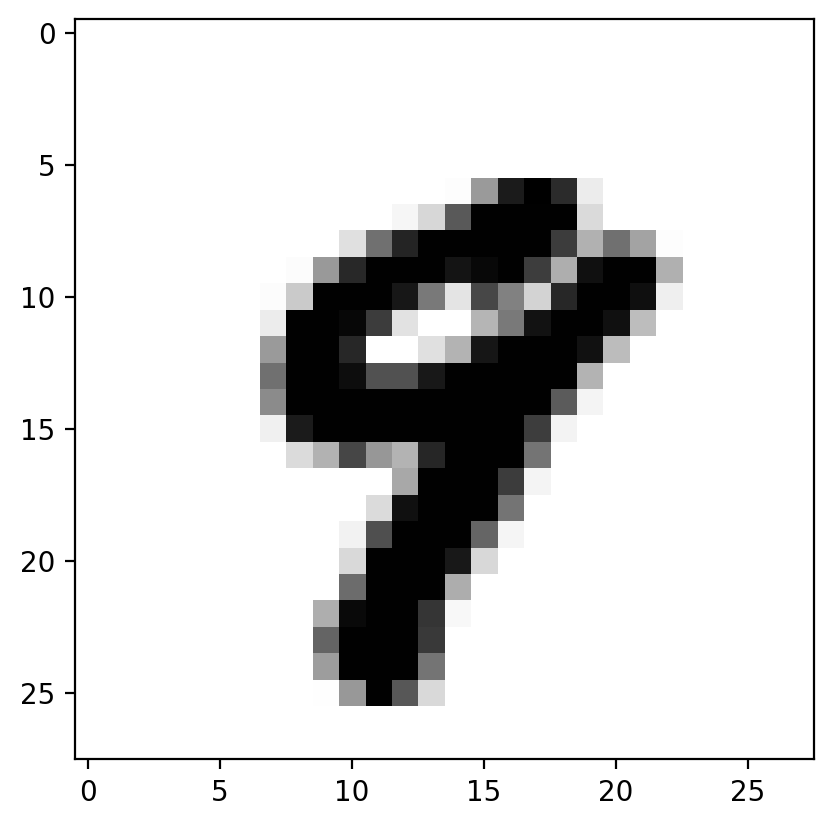

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

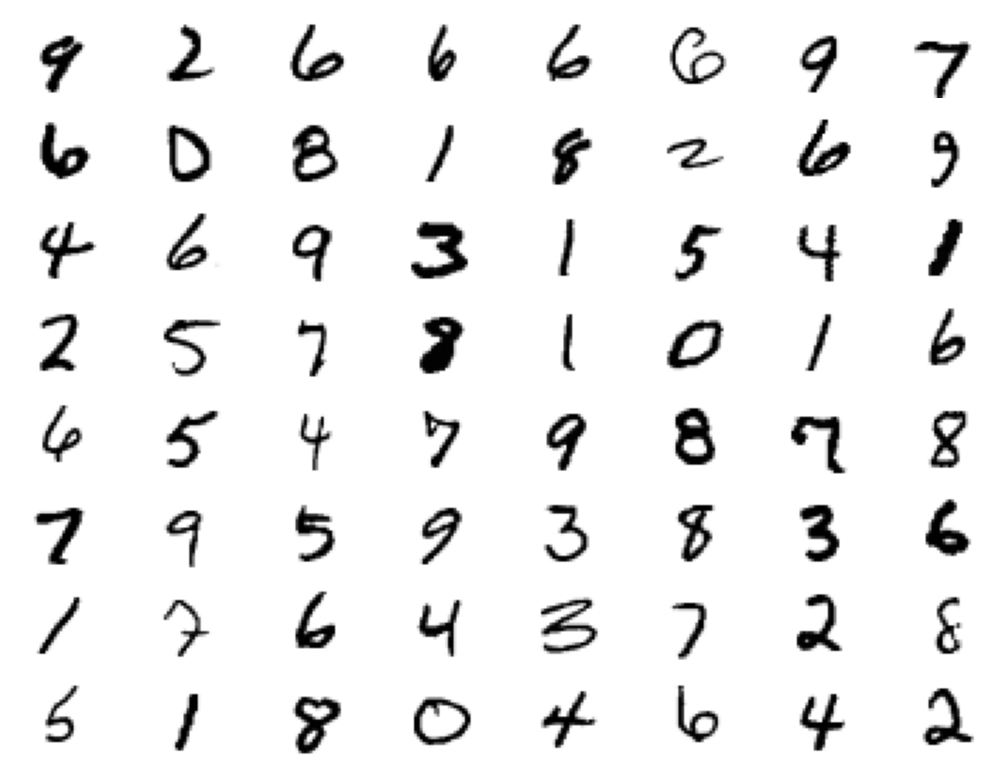

In [6]:
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(8, 8, index+1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [7]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [8]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images.to(device))
loss = criterion(logps, labels.to(device))

In [9]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        [ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024]],
       device='mps:0')


In [10]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [11]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.to(device))
loss = criterion(output, labels.to(device))
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0139, -0.0153,  0.0191,  ...,  0.0219,  0.0054,  0.0353],
        [-0.0162,  0.0315,  0.0040,  ...,  0.0199,  0.0222,  0.0029],
        [-0.0009,  0.0070, -0.0177,  ...,  0.0328,  0.0126, -0.0128],
        ...,
        [ 0.0177,  0.0063, -0.0131,  ...,  0.0062, -0.0173,  0.0298],
        [-0.0235,  0.0273, -0.0075,  ...,  0.0290, -0.0006, -0.0308],
        [ 0.0040,  0.0304, -0.0035,  ..., -0.0090,  0.0006, -0.0038]],
       device='mps:0', requires_grad=True)
Gradient - tensor([[ 0.0031,  0.0031,  0.0031,  ...,  0.0031,  0.0031,  0.0031],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0032, -0.0032, -0.0032,  ..., -0.0032, -0.0032, -0.0032],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012]],
       device='mps:0')


In [12]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0138, -0.0153,  0.0191,  ...,  0.0219,  0.0053,  0.0353],
        [-0.0162,  0.0315,  0.0041,  ...,  0.0200,  0.0223,  0.0029],
        [-0.0009,  0.0070, -0.0177,  ...,  0.0328,  0.0126, -0.0128],
        ...,
        [ 0.0177,  0.0063, -0.0131,  ...,  0.0062, -0.0173,  0.0298],
        [-0.0234,  0.0273, -0.0075,  ...,  0.0290, -0.0006, -0.0308],
        [ 0.0040,  0.0304, -0.0035,  ..., -0.0090,  0.0007, -0.0038]],
       device='mps:0', requires_grad=True)


### Core Training Of Neural Network

In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.to(device))
        loss = criterion(output, labels.to(device))
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6285232445642129
Epoch 1 - Training loss: 0.2886231702798084
Epoch 2 - Training loss: 0.22277964447051096
Epoch 3 - Training loss: 0.17781973979684082
Epoch 4 - Training loss: 0.1489222874956281
Epoch 5 - Training loss: 0.12759942936002097
Epoch 6 - Training loss: 0.1110556683004665
Epoch 7 - Training loss: 0.09950865993101492
Epoch 8 - Training loss: 0.08919382391364447
Epoch 9 - Training loss: 0.08121427558541203
Epoch 10 - Training loss: 0.07440112092331655
Epoch 11 - Training loss: 0.06810166975155647
Epoch 12 - Training loss: 0.062330287090365664
Epoch 13 - Training loss: 0.05731539274883597
Epoch 14 - Training loss: 0.053082487156201626

Training Time (in minutes) = 1.1201473474502563


In [14]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


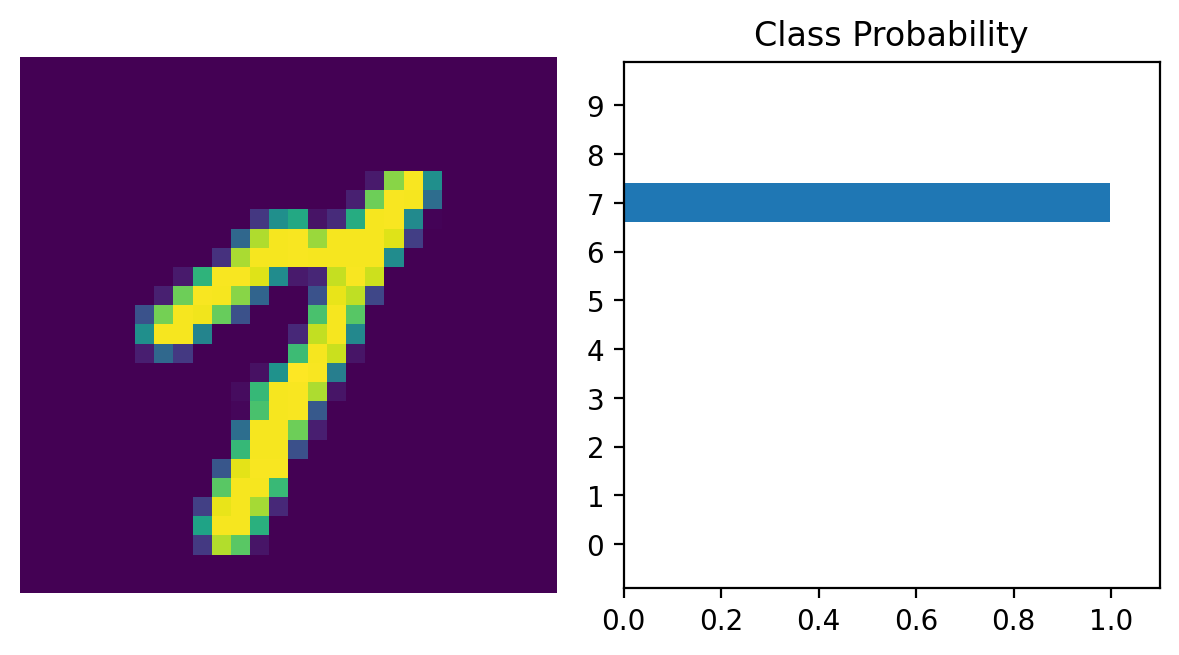

In [15]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.to(device))

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [16]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.to(device))

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9743
